<a href="https://colab.research.google.com/github/Mohamed-ux-beep/OutlierDetectionAndHandling/blob/main/OutliersDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# generate random data, seed to assure reproducability
np.random.seed(42)

data = pd.DataFrame(
    {'value': np.random.normal(0, 1, 1000)}
)

**Outlier detection**

In [3]:
# Function to detect Outliers using IQR : Interquartile Range

def detect_outliers_iqr(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return (data < lower_bound) | (data > upper_bound)

outliers = detect_outliers_iqr(data.value)
print(f"Number of outliers detected: {sum(outliers)}")

Number of outliers detected: 8


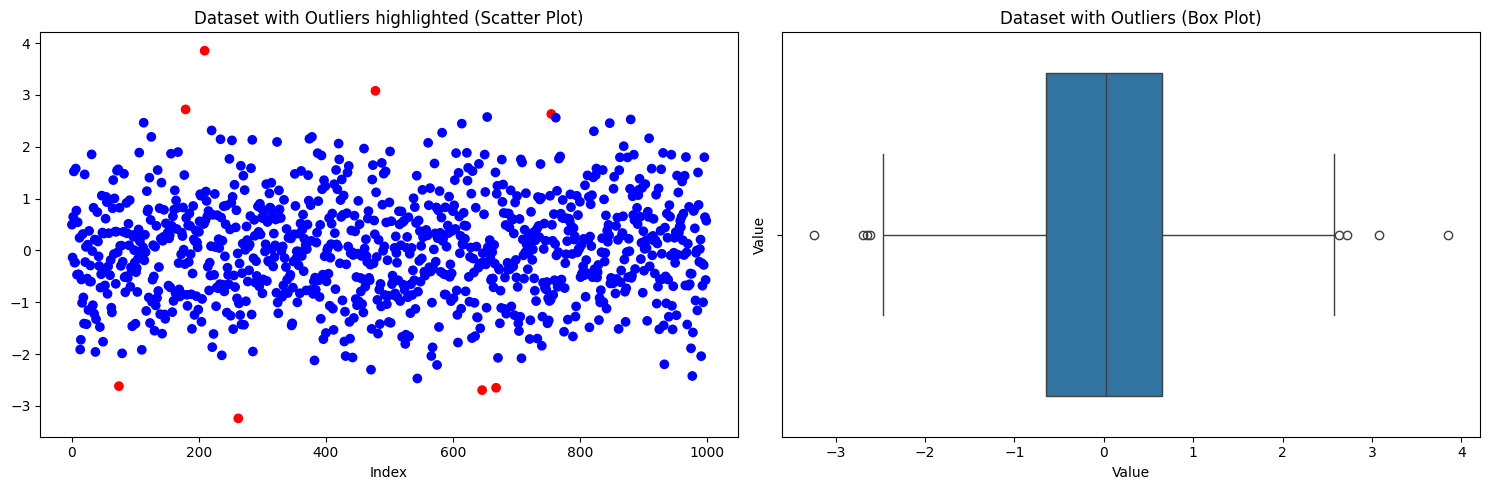

In [4]:
# visualize the data using scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# the first plot
ax1.scatter(range(len(data)), data['value'], c = ['blue' if not x else 'red' for x in outliers])
ax1.set_title('Dataset with Outliers highlighted (Scatter Plot)')
ax1.set_xlabel('Index')
ax2.set_ylabel('Value')

sns.boxplot(x=data['value'], ax=ax2)
ax2.set_title('Dataset with Outliers (Box Plot)')
ax2.set_xlabel('Value')

plt.tight_layout()
plt.show()

**Handling the Outliers**



*   Removing of outliers
*   Capping of outliers
*   Imputing outliers



Original dataset size 1000
Cleaned dataset size  992


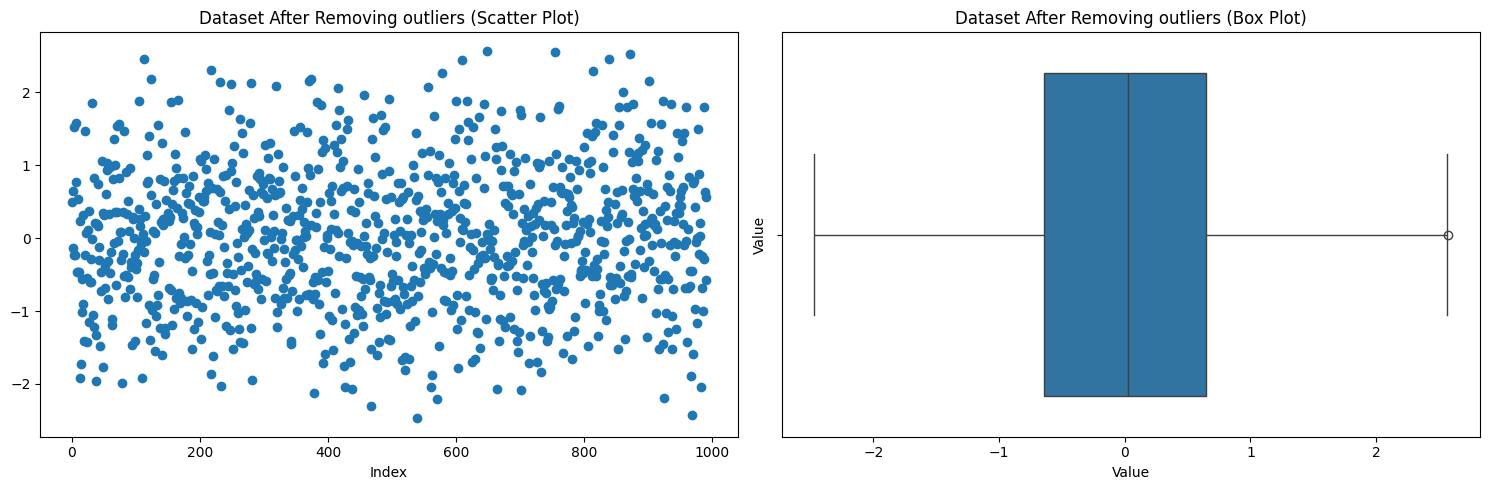

In [5]:
# remove the outliers
clean_data = data[~outliers]

print(f"Original dataset size {len(data)}")
print(f"Cleaned dataset size  {len(clean_data)}")

# visualize the data using scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# the first plot
ax1.scatter(range(len(clean_data)), clean_data['value'])
ax1.set_title('Dataset After Removing outliers (Scatter Plot)')
ax1.set_xlabel('Index')
ax2.set_ylabel('Value')

sns.boxplot(x=clean_data['value'], ax=ax2)
ax2.set_title('Dataset After Removing outliers (Box Plot)')
ax2.set_xlabel('Value')

plt.tight_layout()
plt.show()


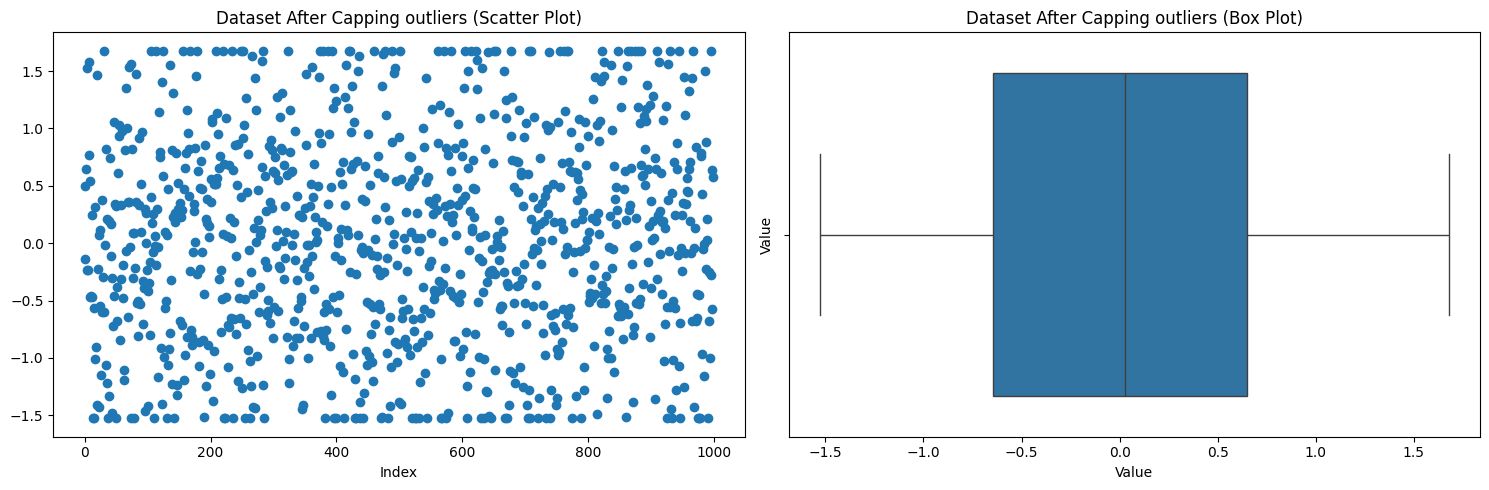

In [6]:
# Capping the outliers
def cap_outliers(data, lower_percentile=5, upper_percentile=95):
  lower_limit = np.percentile(data, lower_percentile)
  upper_limit = np.percentile(data, upper_percentile)
  return np.clip(data, lower_limit, upper_limit)

data['value capped'] = cap_outliers(data['value'])

# visualize the data using scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# the first plot
ax1.scatter(range(len(data)), data['value capped'])
ax1.set_title('Dataset After Capping outliers (Scatter Plot)')
ax1.set_xlabel('Index')
ax2.set_ylabel('Value')

sns.boxplot(x=data['value capped'], ax=ax2)
ax2.set_title('Dataset After Capping outliers (Box Plot)')
ax2.set_xlabel('Value')

plt.tight_layout()
plt.show()


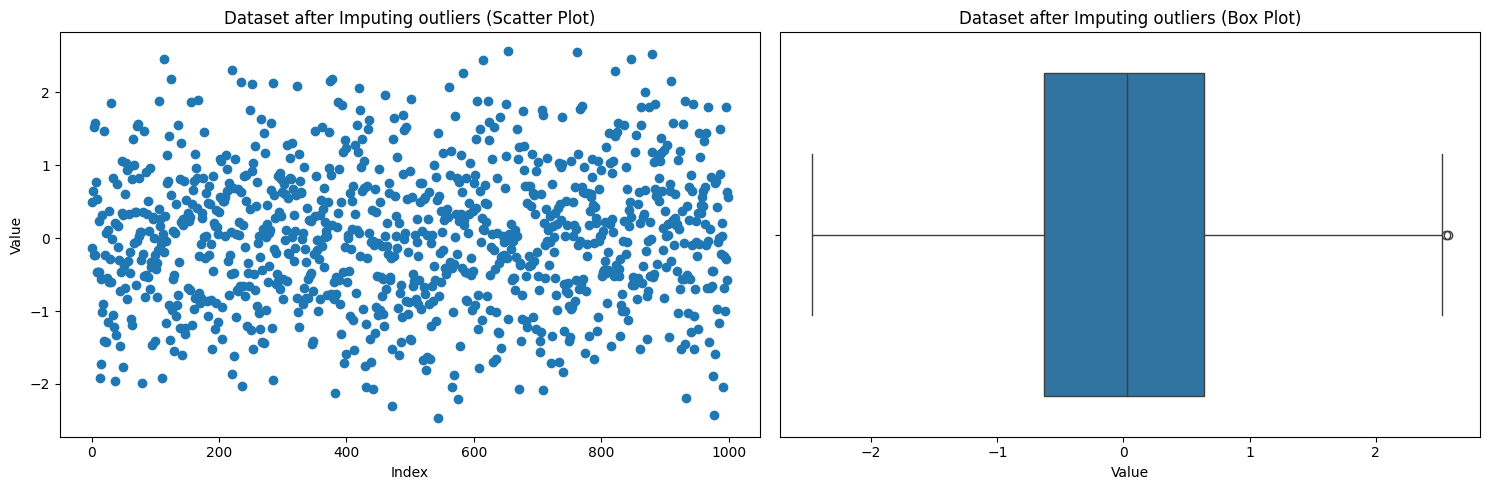

In [12]:
# Imputing outliers

data['value imputed'] = data['value'].copy()
median_values = data['value'].median()
data.loc[outliers, 'value imputed'] = median_values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(range(len(data)), data['value imputed'])
ax1.set_title("Dataset after Imputing outliers (Scatter Plot)")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

sns.boxplot(x=data['value imputed'], ax=ax2)
ax2.set_title("Dataset after Imputing outliers (Box Plot)")
ax2.set_xlabel("Value")

plt.tight_layout()
plt.show()

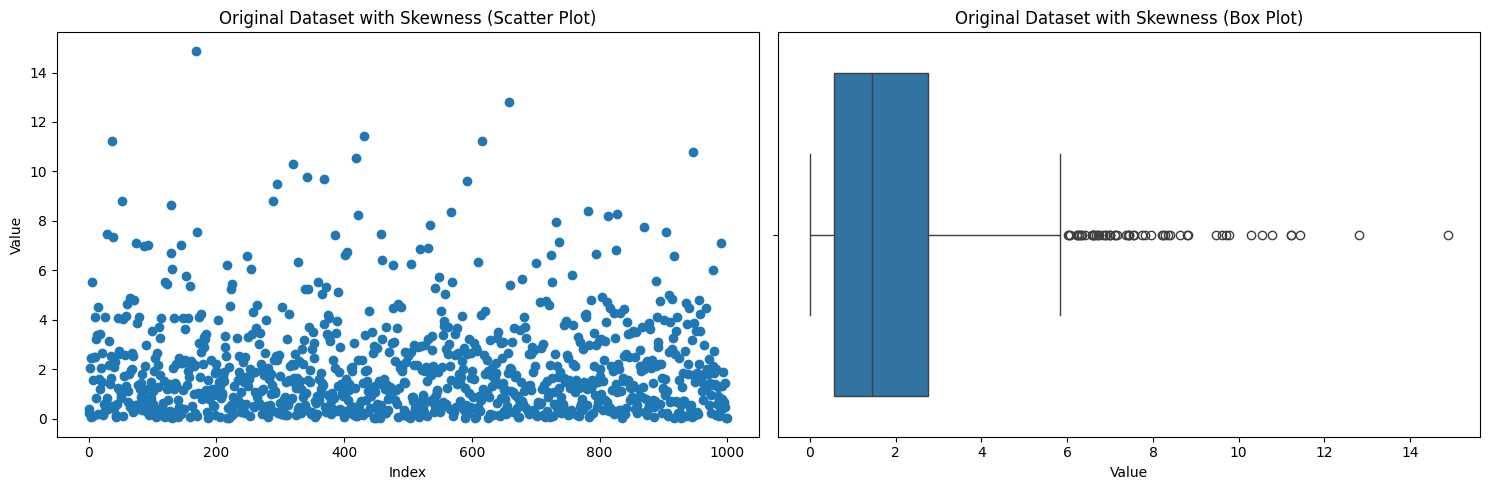

In [13]:
# Data Transformation, generate skewed data

data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(data, columns=['value'])

# apply transformation
df['log_value'] = np.log1p(df['value'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(range(len(df)), df['value'])
ax1.set_title("Original Dataset with Skewness (Scatter Plot)")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

sns.boxplot(x=df['value'], ax=ax2)
ax2.set_title("Original Dataset with Skewness (Box Plot)")
ax2.set_xlabel("Value")

plt.tight_layout()
plt.show()

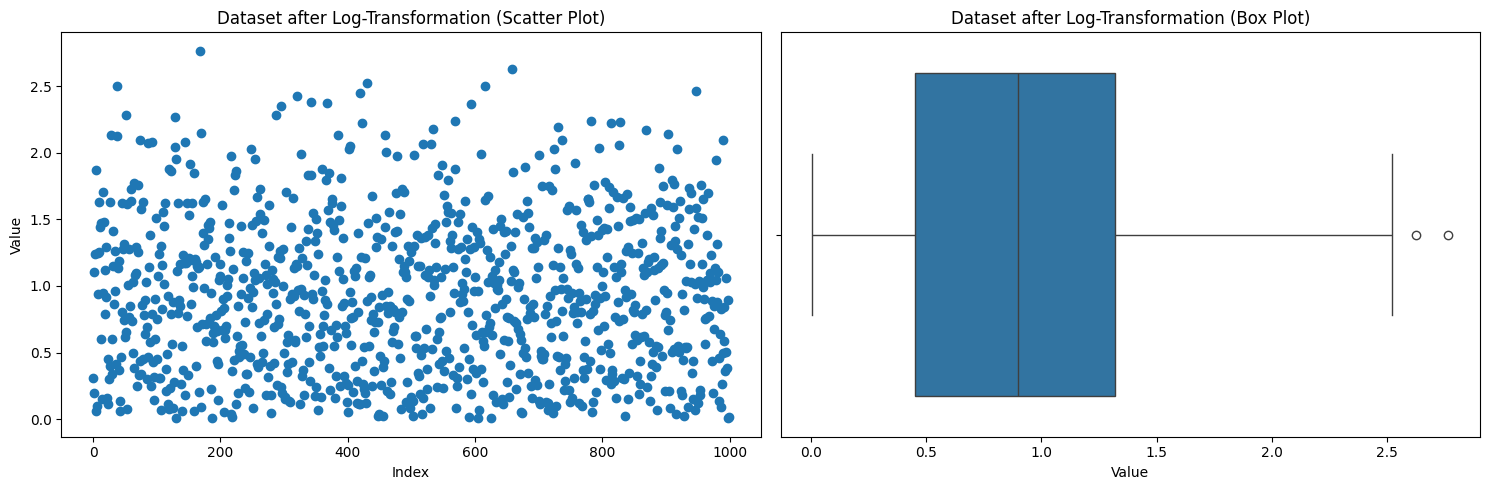

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(range(len(df)), df['log_value'])
ax1.set_title("Dataset after Log-Transformation (Scatter Plot)")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

sns.boxplot(x=df['log_value'], ax=ax2)
ax2.set_title("Dataset after Log-Transformation (Box Plot)")
ax2.set_xlabel("Value")

plt.tight_layout()
plt.show()